In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import itertools
from sklearn import datasets, neighbors
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from scipy import interp
from sklearn.metrics import auc, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNN
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model

print(__doc__)
sns.set()

C:\Users\yaw\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Automatically created module for IPython interactive environment


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def read_test_data():
    X = [];y=[]
    with open('datasets/test.csv', 'r') as f:
        for line in f.readlines():
            pline = [float(line.split(',')[0]),float(line.split(',')[1]),float(line.split(',')[2]),
                   float(line.split(',')[3]),float(line.split(',')[4])]
            
            X.append(pline)
            y.append(int(line.split(',')[5]))
    return [X,y]

def read_data():
    X = [];y=[]
    with open('datasets/train_test.csv', 'r') as f:
        for line in f.readlines():
            pline = [float(line.split(',')[0]),float(line.split(',')[1]),float(line.split(',')[2]),
                   float(line.split(',')[3]),float(line.split(',')[4])]
            
            X.append(pline)
            y.append(int(line.split(',')[5]))
    return [X,y]

In [4]:
# Read Data
out = read_data(); X = out[0]; y = out[1]
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)
# Apply SMOTE SVM
sm = SMOTE(kind='regular',ratio=0.9)
#sm = SMOTE(kind='svm')
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

[0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1]
0.926126126126
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0]
0.964864864865
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0]
0.954054054054
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0]
0.966666666667
[0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1]
0.894594594595
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0]
0.972972972973


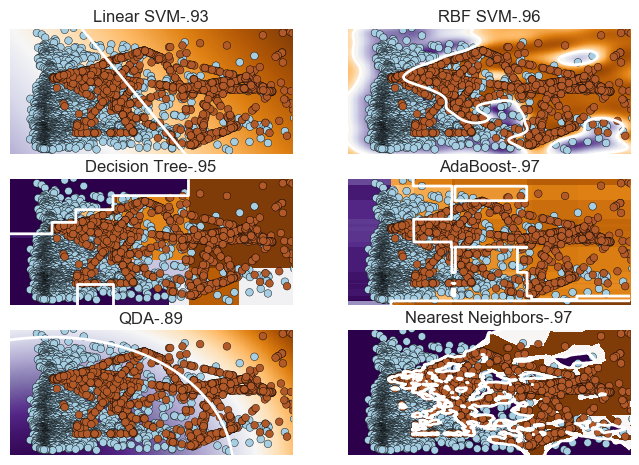

In [5]:
X_train, X_test, y_train, y_test = tts(X_resampled, y_resampled, random_state=42)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

names = ["Linear SVM", "RBF SVM","Decision Tree","AdaBoost","QDA","Nearest Neighbors"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=8, C=1),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    KNN(2)]

classifiers2 = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=8, C=1),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    KNN(2)]
ix=1

for cltx,gbclass,name in zip(classifiers,classifiers2,names):
    cltx.fit(X_res_vis, y_resampled)
    gbclass.fit(X_train, y_train)
    outt = read_test_data();
    y_pred = gbclass.fit(X_train, y_train).predict(outt[0])
    print y_pred

    score = gbclass.score(X_test, y_test)
    print score
    if hasattr(cltx, "decision_function"):
        Z = cltx.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = cltx.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(3, 2, ix); ix+=1
    ax.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linetypes='--')
    ax.set_title(name + '-' + ('%.2f' % score).lstrip('0'))
    ax.scatter(X_res_vis[:, 0], X_res_vis[:, 1], s=30, c=y_resampled, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-1.0, 3, -1.5, 3])

plt.show()

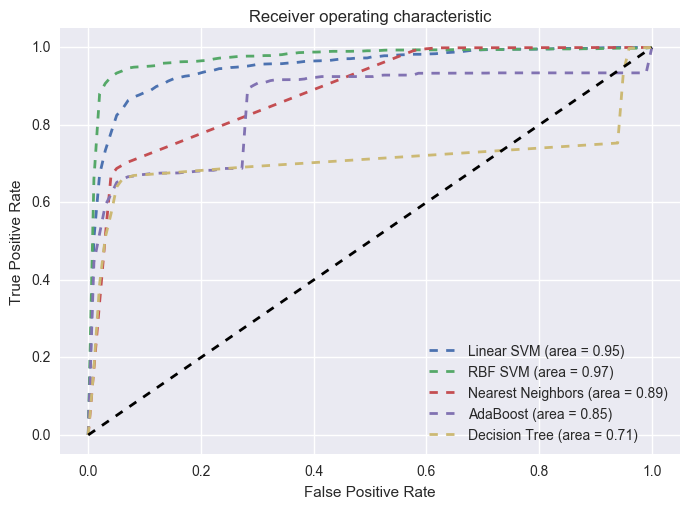

In [7]:
# ROC Curves
classifiers2 = [
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=8, C=2,probability=True),KNN(2),AdaBoostClassifier(),DecisionTreeClassifier(max_depth=5)]
names = ["Linear SVM", "RBF SVM","Nearest Neighbors","AdaBoost","Decision Tree"]
cv = StratifiedKFold(n_splits=3)
ix=1
for gbclass,name in zip(classifiers2,names):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X_resampled, y_resampled):
        probas_ = gbclass.fit(X_resampled[train], y_resampled[train]).predict_proba(X_resampled[test])
        fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
    mean_tpr /= cv.get_n_splits(X_resampled, y_resampled)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, linestyle='--',
             label='{} (area = %0.2f)'.format(name) % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

plt.show()

Confusion matrix, without normalization
[[569  35]
 [ 47 459]]
Confusion matrix, without normalization
[[577  27]
 [  6 500]]
Confusion matrix, without normalization
[[588  16]
 [ 14 492]]
Confusion matrix, without normalization
[[585  19]
 [ 18 488]]
Confusion matrix, without normalization
[[569  35]
 [ 16 490]]
Confusion matrix, without normalization
[[574  30]
 [ 87 419]]


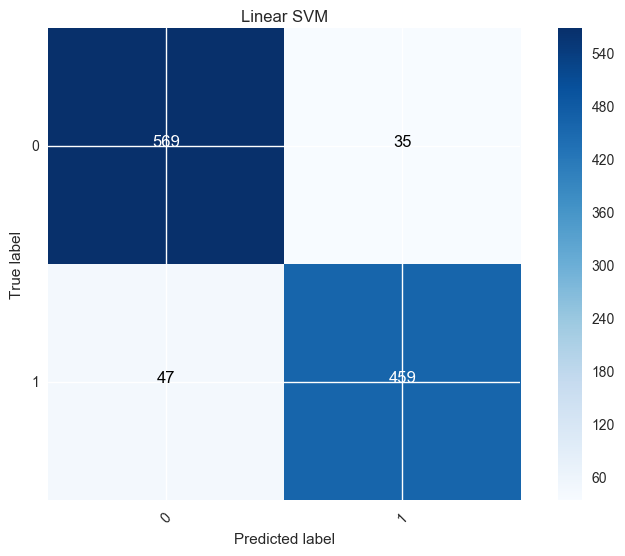

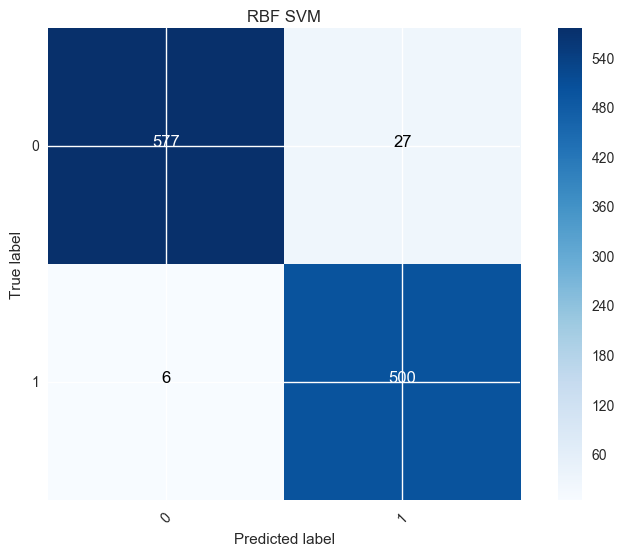

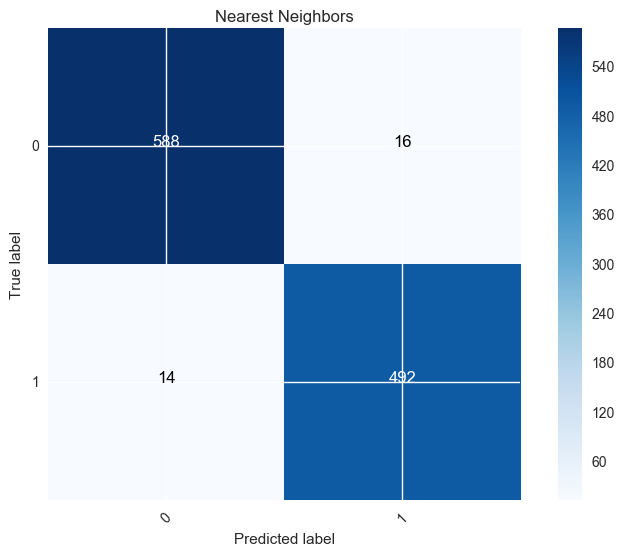

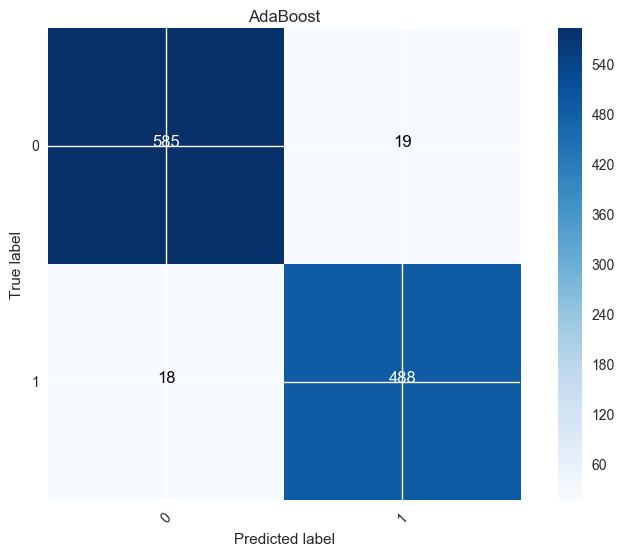

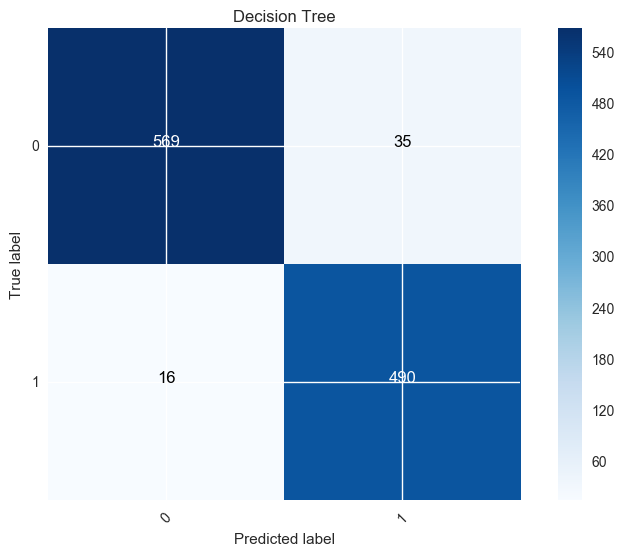

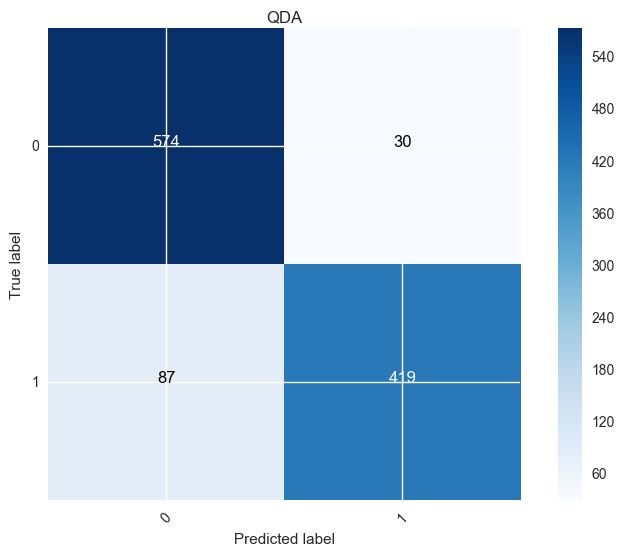

In [8]:
# Confusion matrix
classifiers2 = [
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=8, C=2,probability=True),KNN(2),AdaBoostClassifier(),DecisionTreeClassifier(max_depth=5),
    QuadraticDiscriminantAnalysis()]
names = ["Linear SVM", "RBF SVM","Nearest Neighbors","AdaBoost","Decision Tree","QDA"]
ix=1
for gbclass,name in zip(classifiers2,names):
    y_pred = gbclass.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    class_names = [0,1]
    class_names = [0,1]
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title= name)
plt.show()

In [9]:
# precision recall
classifiers2 = [
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=8, C=2,probability=True),KNN(2),AdaBoostClassifier(),DecisionTreeClassifier(max_depth=5),
    QuadraticDiscriminantAnalysis()]
names = ["Linear SVM", "RBF SVM","Nearest Neighbors","AdaBoost","Decision Tree","QDA"]
ix=1
for gbclass,name in zip(classifiers2,names):
    y_pred = gbclass.fit(X_train, y_train).predict(X_test)
    gbclass.fit(X_train, y_train)
    y_hat = gbclass.predict(X_test)
    
    print name
    print(classification_report(y_test, y_hat))
    print '........'

Linear SVM
             precision    recall  f1-score   support

          0       0.92      0.94      0.93       604
          1       0.93      0.91      0.92       506

avg / total       0.93      0.93      0.93      1110

........
RBF SVM
             precision    recall  f1-score   support

          0       0.99      0.96      0.97       604
          1       0.95      0.99      0.97       506

avg / total       0.97      0.97      0.97      1110

........
Nearest Neighbors
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       604
          1       0.97      0.97      0.97       506

avg / total       0.97      0.97      0.97      1110

........
AdaBoost
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       604
          1       0.96      0.96      0.96       506

avg / total       0.97      0.97      0.97      1110

........
Decision Tree
             precision    recall  f1-score  

In [21]:
# Feature Importance
names = ["Random Forest"]
classifiers = [RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

classifiers2 = [RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
ix=1
for cltx,gbclass,name in zip(classifiers,classifiers2,names):
    cltx.fit(X_res_vis, y_resampled)
    gbclass.fit(X_train, y_train)
    outt = read_test_data();
    y_pred = gbclass.fit(X_train, y_train).predict(outt[0])
    score = gbclass.score(X_test, y_test)


[ 0.1   0.28  0.37  0.2   0.05]
[2 1 3 0 4]


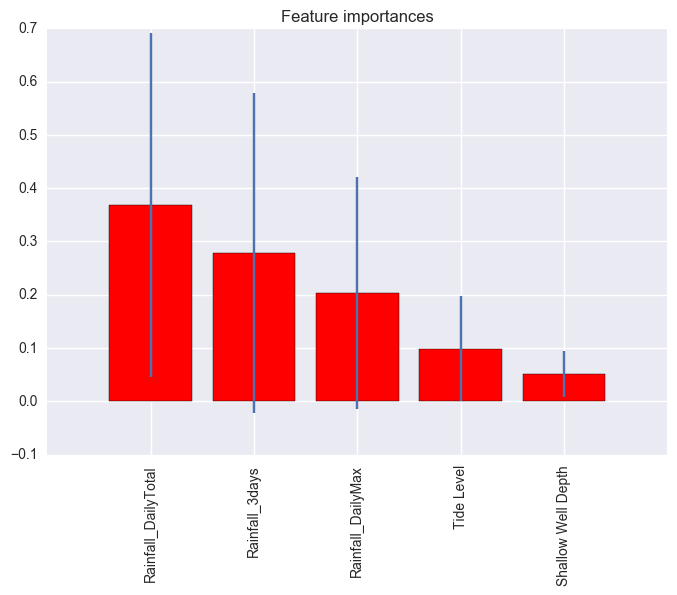

In [22]:
# Important Features
importances = gbclass.feature_importances_
print importances
std = np.std([tree.feature_importances_ for tree in gbclass.estimators_],
         axis=0)
indices = np.argsort(importances)[::-1]
print indices

labels = ['Rainfall_DailyTotal', 'Rainfall_3days', 'Rainfall_DailyMax', 'Tide Level', 'Shallow Well Depth']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
   color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.savefig('Feature_Importance.png')
plt.show()